In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import os


In [13]:
os.getcwd()

'c:\\Users\\Johnathan\\Desktop\\Bootcamp\\Project\\AI_BOOTCAMP_Group_Project_1_Energy_Consumption\\Generation'

In [14]:
#Load file
file_path = 'clean_for_graph.xlsx'
df_graph_data = pd.read_excel(file_path)
df_graph_data.head()

,Year,Total Megawatthours
0,2013,8131928
1,2014,8253766
2,2015,8246405
3,2016,8280309
4,2017,8246161


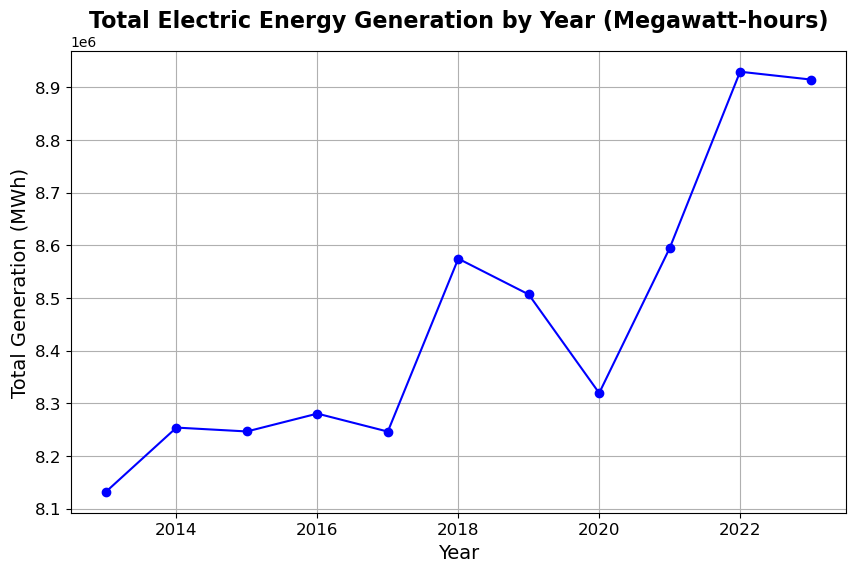

In [16]:
#Plot
plt.figure(figsize=(10,6))
plt.plot(df_graph_data['Year'], df_graph_data['Total Megawatthours'], marker='o', linestyle='-', color='blue')
plt.title('Total Electric Energy Generation by Year (Megawatt-hours)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Generation (MWh)', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
#Prep data for Prophet
df_prophet = df_graph_data[['Year', 'Total Megawatthours']].rename(columns={'Year': 'ds', 'Total Megawatthours': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')


In [20]:
#Initialize the Prophet model and fit to data
model = Prophet()
model.fit(df_prophet)


21:22:43 - cmdstanpy - INFO - Chain [1] start processing
21:22:44 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
#Create the future df
future = model.make_future_dataframe(periods=12, freq='YE')

In [25]:
#Make the predictions with the Prophet model
forecast = model.predict(future)


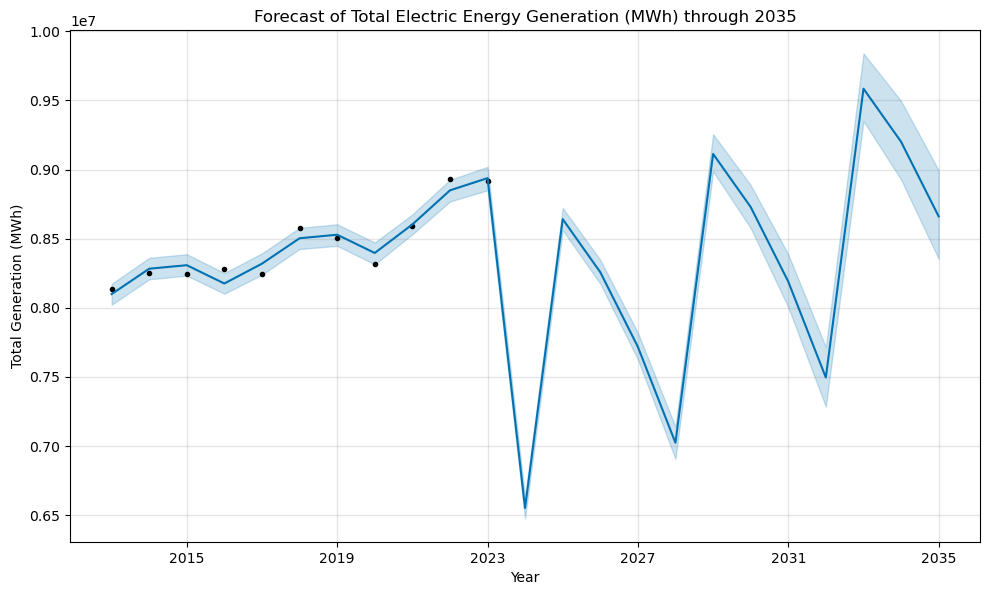

In [26]:
#Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of Total Electric Energy Generation (MWh) through 2035')
plt.xlabel('Year')
plt.ylabel('Total Generation (MWh)')
plt.grid(True)
plt.show()

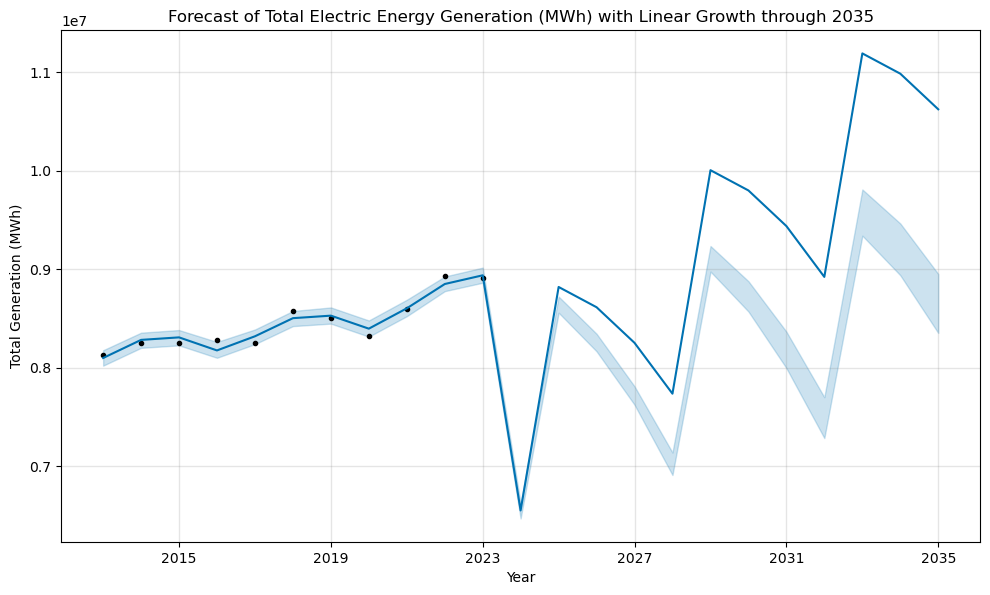

In [39]:
#Fine tune the model
#EIA predicts a 1-3% growth in energy generation over the next 10 years.
#growth_rate = .02
#start_year = 2023
#forecast.loc[forecast['ds'].dt.year >= start_year, 'yhat'] = forecast.loc[
#    forecast['ds'].dt.year >= start_year, 'yhat'
#].apply(lambda x, yr=start_year: x * (1 + growth_rate)**(forecast['ds'].dt.year - yr))
#fig = model.plot(forecast)
#plt.title('Forecast of Total Electric Energy Generation (MWh) with Growth Rate through 2035')
#plt.xlabel('Year')
#plt.ylabel('Total Generation (MWh)')
#plt.grid(True)
#plt.show()
future = model.make_future_dataframe(periods=12, freq='YE')
forecast = model.predict(future)
linear_growth_rate = 0.02
last_known_value = df_prophet['y'].iloc[-1]
for year in range(2023, 2036):
    years_from_start = year - 2023
    linear_increment = last_known_value * (linear_growth_rate * years_from_start)
    forecast.loc[forecast['ds'].dt.year == year, 'yhat'] += linear_increment

#Plot
fig = model.plot(forecast)
plt.title('Forecast of Total Electric Energy Generation (MWh) with Linear Growth through 2035')
plt.xlabel('Year')
plt.ylabel('Total Generation (MWh)')
plt.grid(True)
plt.show()
